# CellMap for pancreas endocrine cell data

The tutorial for pancreas endocrine cell data ([Bastidas et al., 2019](https://doi.org/10.1242/dev.173849)).

## Regular procedure

In [1]:
import cellmap
import anndata
import matplotlib.pyplot as plt
import numpy as np
import scanpy

### The dataset is installed using the [scvelo](https://scvelo.readthedocs.io/en/stable/) package. 

In [2]:
import scvelo as scv
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

### Preprocessing the raw data

In [3]:
scanpy.pp.normalize_total(adata, target_sum=1e4)
scanpy.pp.log1p(adata)

### Apply RNA velocity and show the stream on UMAP

In [4]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)
scv.tl.velocity(adata,mode='stochastic')
scv.tl.velocity_graph(adata)

Normalized count data: spliced, unspliced.
computing neighbors


2023-04-02 18:29:49.090796: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-02 18:29:49.093773: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 18:29:49.308909: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 18:29:49.309867: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 18:29:53.588718: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

    finished (0:00:37) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:08) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:16) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:01:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


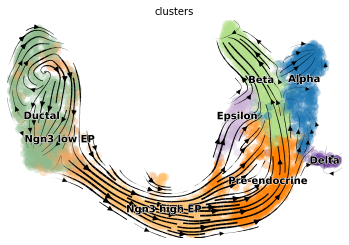

In [5]:
scv.pl.velocity_embedding_stream(adata)

### Compute Hodge potential

{'Contribution_ratio': {'Potential': '63.41%', 'Rotation': '36.59%'}}
CPU times: user 4min 6s, sys: 5min 10s, total: 9min 16s
Wall time: 2min 58s


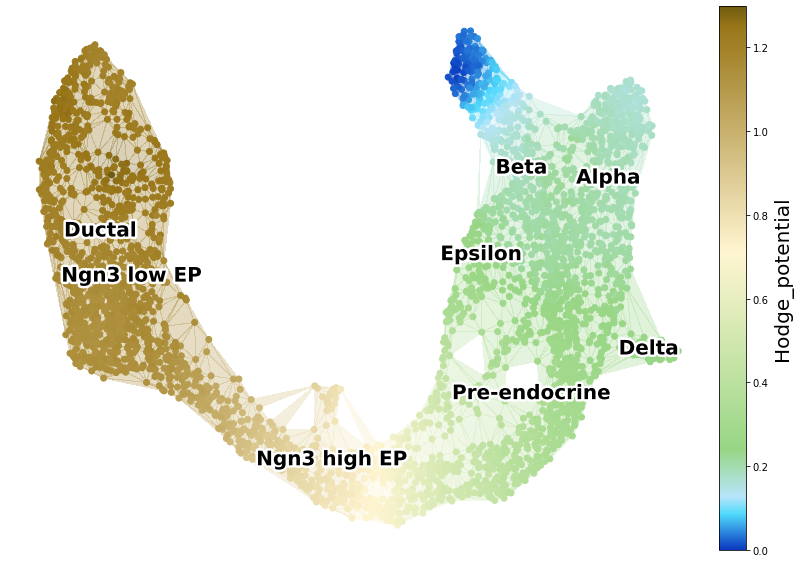

In [6]:
%%time
import cellmap

cellmap.Hodge_decomposition(adata)
cellmap.view(adata,show_graph = True,cluster_key = 'clusters')

### Views

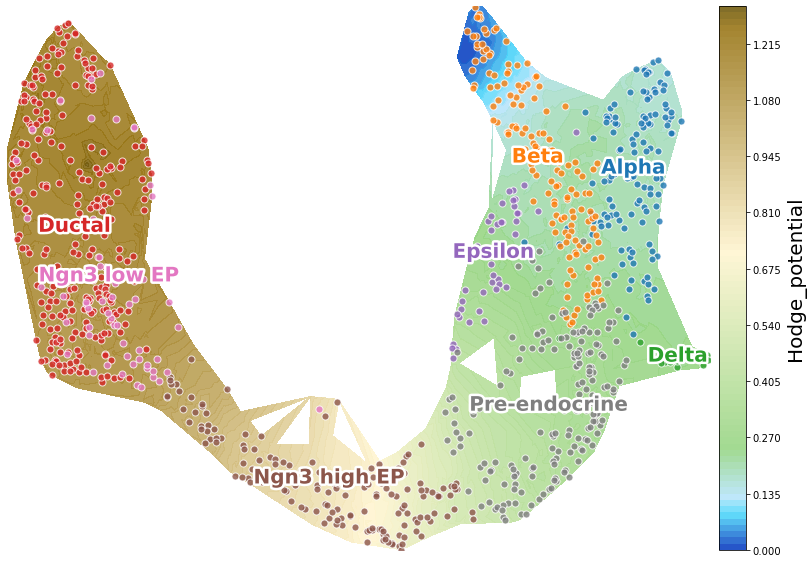

In [21]:
cellmap.view_cluster(adata, show_graph=True, cluster_key='clusters',s=50)

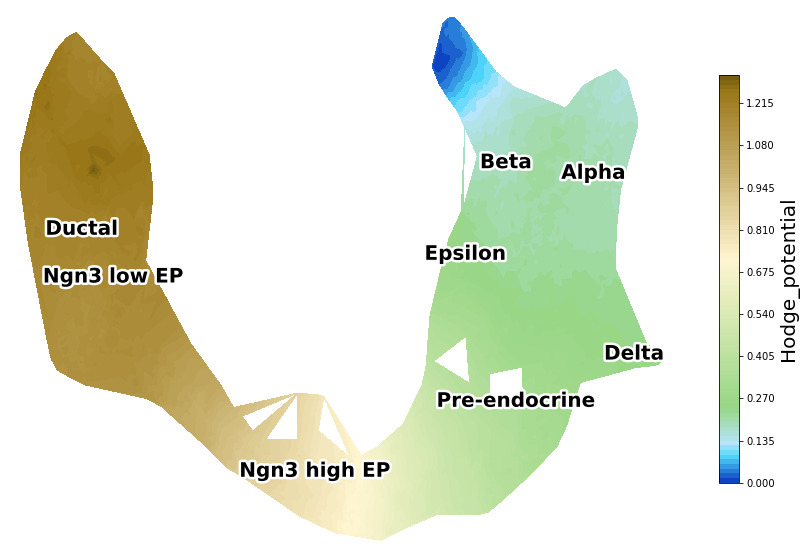

In [8]:
cellmap.view_surface(adata,cluster_key ='clusters')

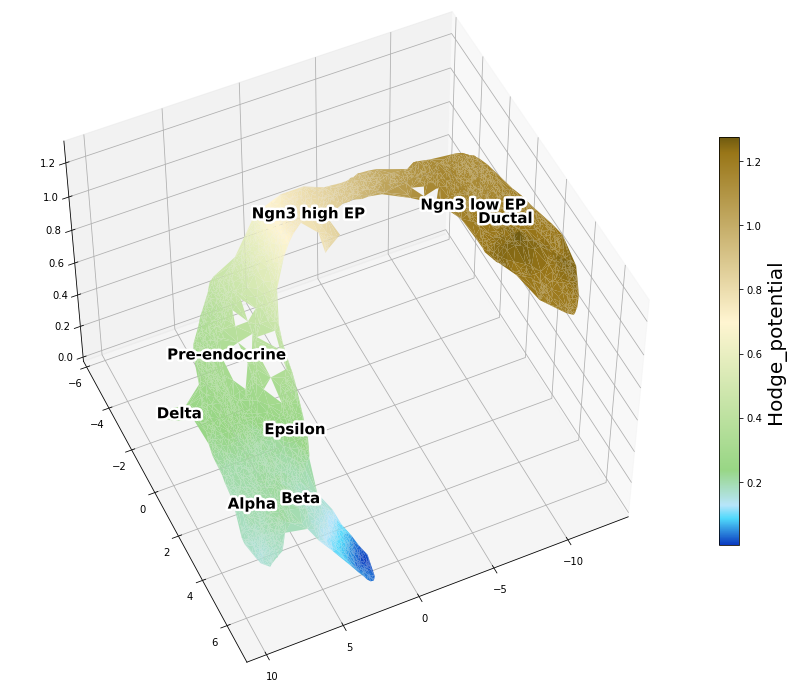

In [9]:
cellmap.view_surface_3D(adata,cluster_key ='clusters',elev=50,azim=65)

500 3696 500


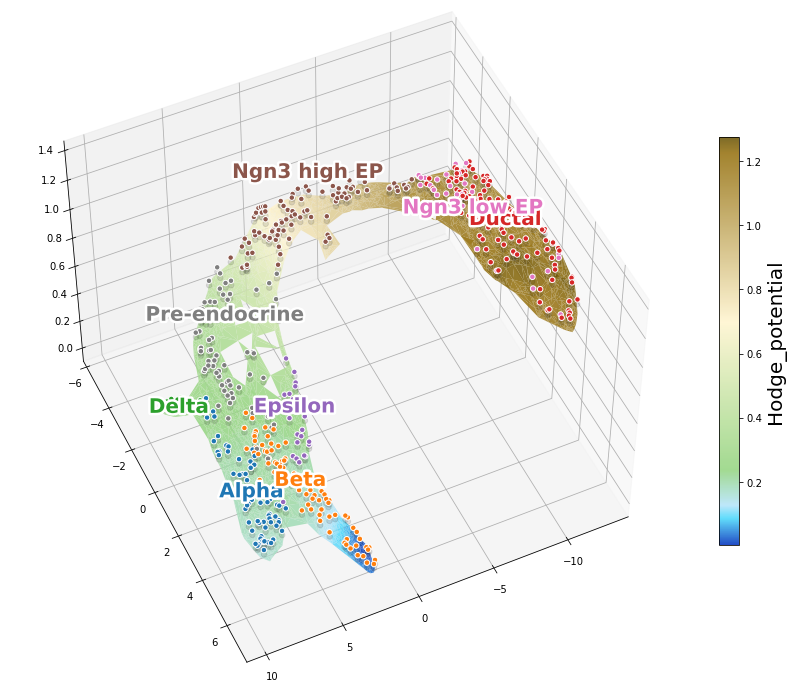

In [10]:
cellmap.view_surface_3D_cluster(adata,cluster_key ='clusters',elev=50,azim=65,s=30);

### Write expression and potential data as CSV file for **[CellMap viewer](https://github.com/yusuke-imoto-lab/CellMapViewer)**. 

In [11]:
cellmap.write(adata,filename='CellMap_tutorial_pancreas')

succeeded in writing CellMapp data as "CellMap_tutorial_pancreas.csv"
You can visualize the CDV file by CellMapp viewer https://yusuke-imoto-lab.github.io/CellMapViewer/CellMapViewer/viewer.html


,X,Y,Potential,Annotation,HVG_Npy,HVG_Krtap17-1,HVG_Gast,HVG_Ppy,HVG_8430408G22Rik,HVG_Ppp1r1a,HVG_Peg10,HVG_Ppp1r14a,HVG_Mfap4,HVG_Igfbp2
CellID,,,,,,,,,,,,,,
AAACCTGAGAGGGATA,6.143066,-0.063644,0.246683,Pre-endocrine,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
AAACCTGAGCCTTGAT,-9.906417,0.197778,1.153080,Ductal,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
AAACCTGAGGCAATTA,7.559791,0.583762,0.223162,Alpha,0.0,0.0,2.124774,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
AAACCTGCATCATCCC,-11.283765,4.218998,1.241509,Ductal,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
AAACCTGGTAAGTGGC,1.721565,-4.753407,0.504503,Ngn3 high EP,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,1.095158,1.605291,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTGACATA,4.768472,-1.388353,0.284900,Pre-endocrine,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.734633,0.734633
TTTGTCAAGTGTGGCA,-1.873335,-4.182650,0.772500,Ngn3 high EP,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,1.868868,1.319213,0.000000
TTTGTCAGTTGTTTGG,-9.882250,-0.105594,1.148603,Ductal,0.0,0.0,0.000000,0.000000,1.068354,0.0,0.00000,0.000000,0.000000,0.000000


## Changing parameter $\alpha$

The parameter $\alpha$ adjust the rate of original/reduced dimensional information of gene expression and velocity. 

$\alpha=0$ uses only two-dimensional inormation; in contrast, $\alpha=1$ uses the original (non-dimensionaly reduction) information. 

In [12]:
alpha_set = [0,0.5,1]
for alpha in alpha_set:
    cellmap.Hodge_decomposition(adata,potential_key='Hodge_potential_%0.1f' % alpha,alpha=alpha)
adata

{'Contribution_ratio': {'Potential': '53.25%', 'Rotation': '46.75%'}}
{'Contribution_ratio': {'Potential': '63.41%', 'Rotation': '36.59%'}}
{'Contribution_ratio': {'Potential': '81.69%', 'Rotation': '18.31%'}}


AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'Hodge_potential', 'Hodge_rotation', 'Hodge_potential_0.0', 'Hodge_potential_0.5', 'Hodge_potential_1.0'
    var: 'highly_variable_genes', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'log1p', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'CellMap_log', 'CM_graph', 'hvg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

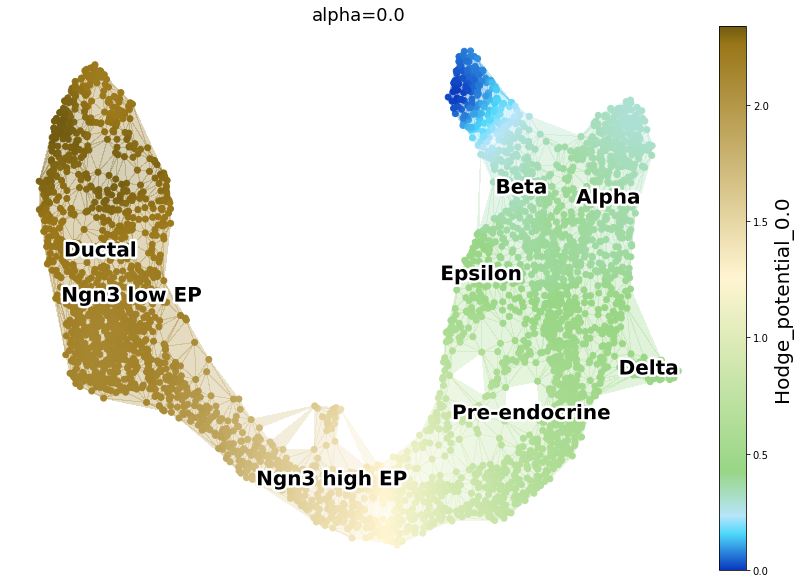

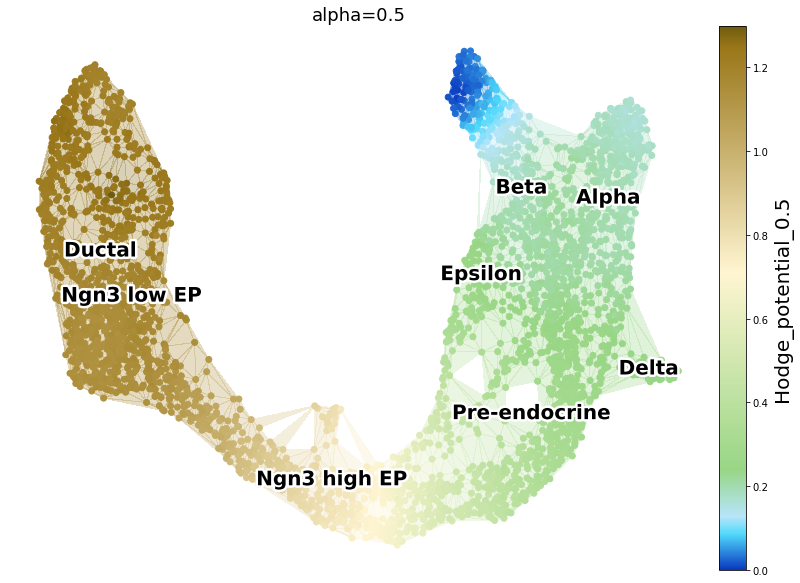

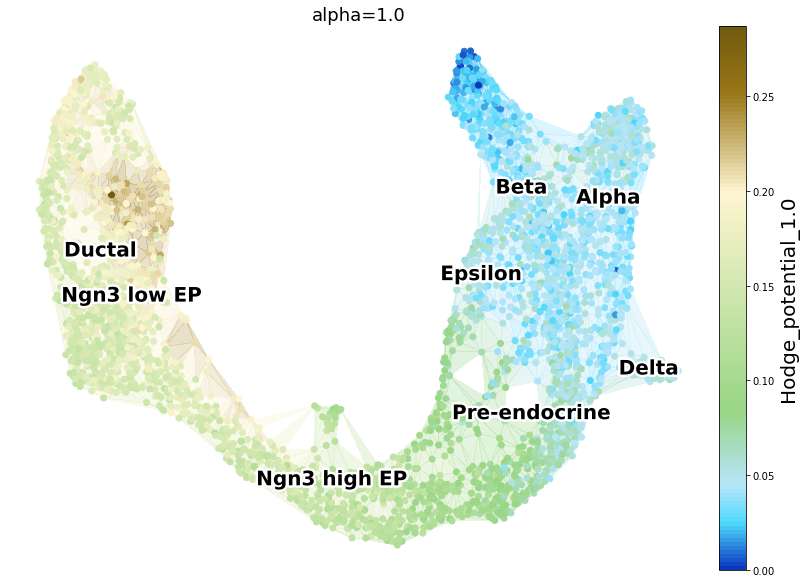

In [13]:
for alpha in alpha_set:
    cellmap.view(adata,show_graph = True,potential_key='Hodge_potential_%0.1f' % alpha,cluster_key='clusters',title='alpha=%0.1f' % alpha)

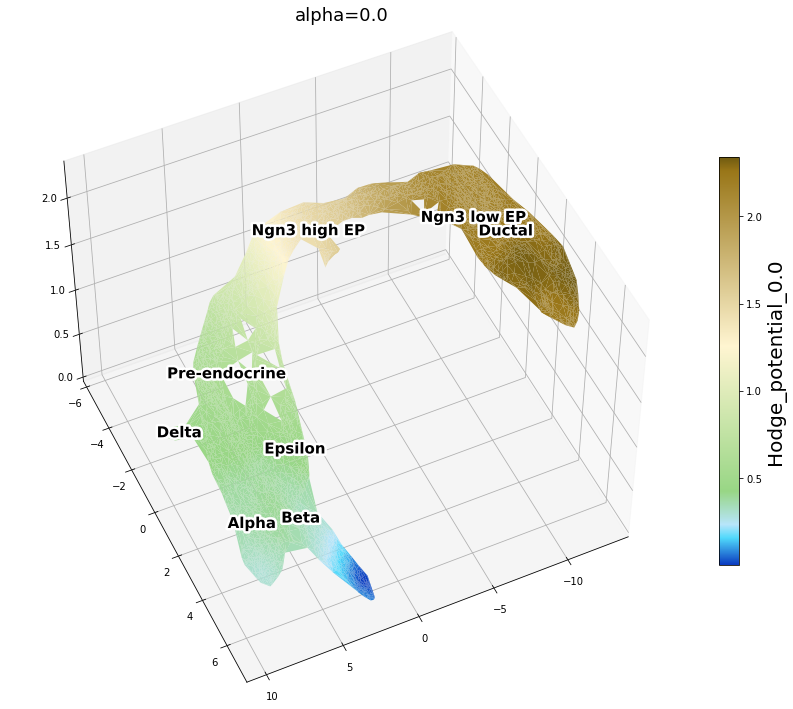

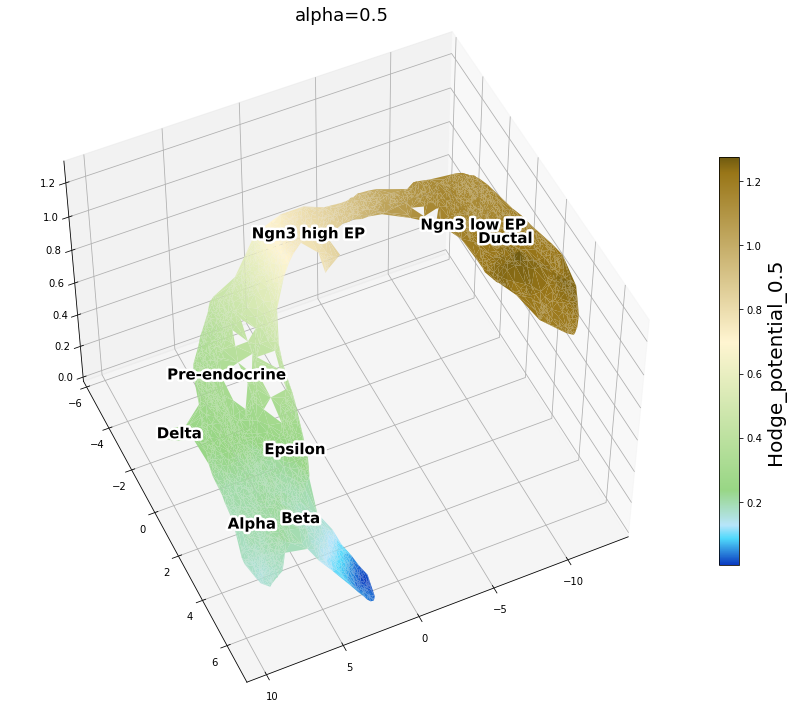

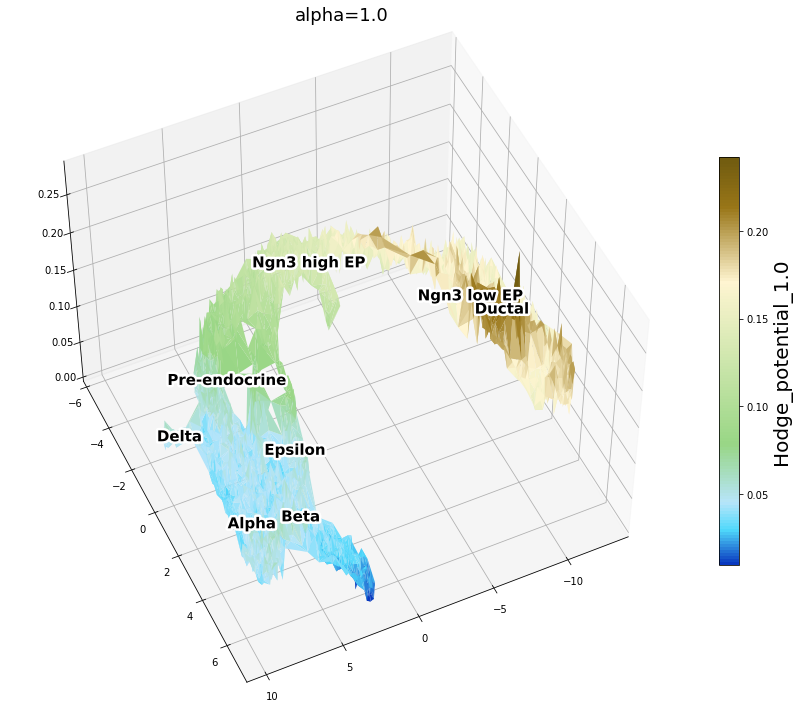

In [20]:
for alpha in alpha_set:
    cellmap.view_surface_3D(adata,cluster_key ='clusters',potential_key='Hodge_potential_%0.1f' % alpha,elev=50,azim=65,title='alpha=%0.1f' % alpha)

{'Contribution_ratio': {'Potential': '59.73%', 'Rotation': '40.27%'}}
{'Contribution_ratio': {'Potential': '65.02%', 'Rotation': '34.98%'}}
{'Contribution_ratio': {'Potential': '74.92%', 'Rotation': '25.08%'}}


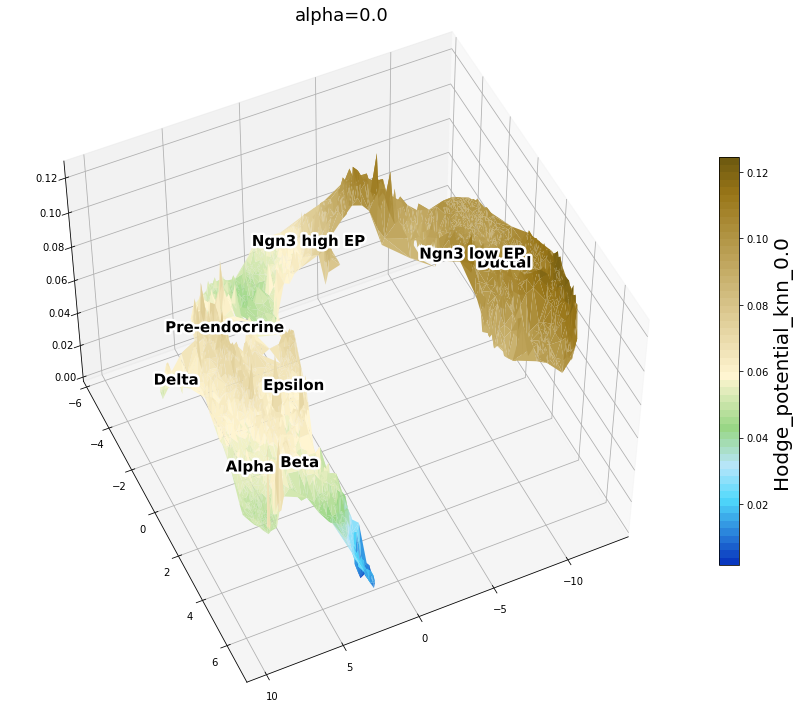

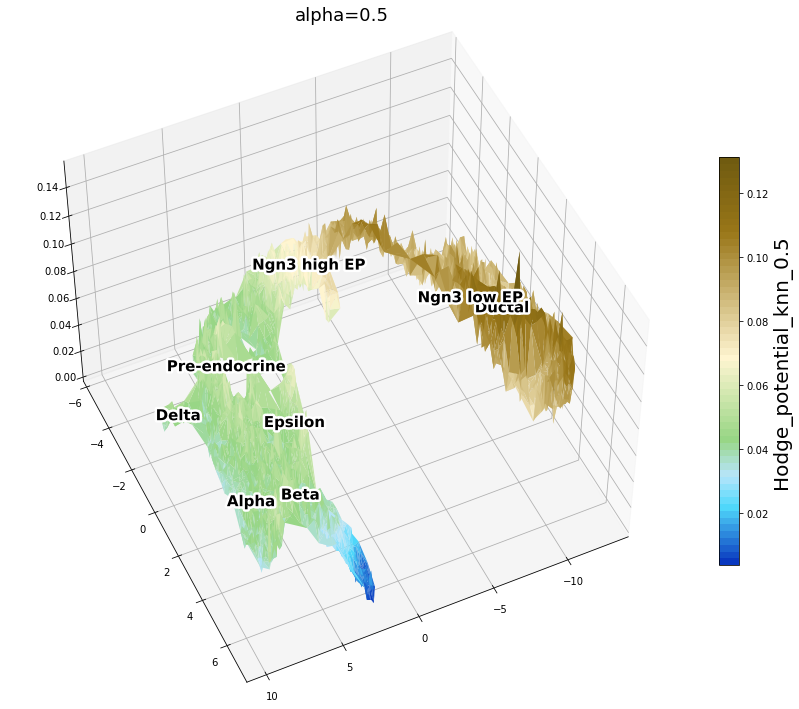

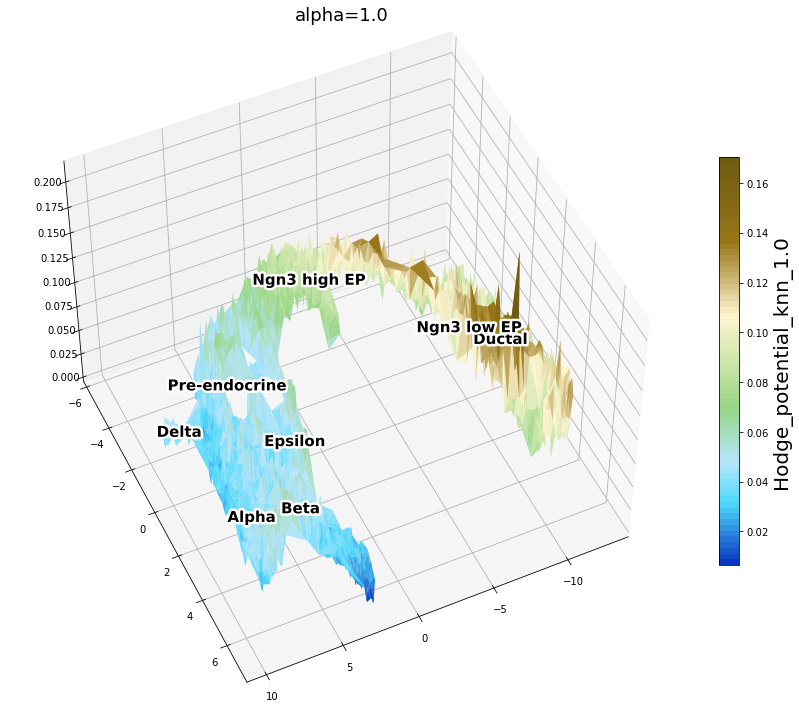

In [15]:
for alpha in alpha_set:
    cellmap.Hodge_decomposition(adata,potential_key='Hodge_potential_knn_%0.1f' % alpha,alpha=alpha, graph_method='knn')
    cellmap.view_surface_3D(adata,cluster_key ='clusters',potential_key='Hodge_potential_knn_%0.1f' % alpha,elev=50,azim=65,title='alpha=%0.1f' % alpha)